In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings
from random import random
import itertools

from sklearn.metrics import mean_squared_error
import os

#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
energy = pd.read_csv('D:/root/GeekBrains/ds4_timeseries/Урок 2/my_PJME_MW.csv', index_col=[0], parse_dates=[0])
energy.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
en_month = energy.resample("M").mean()
en_month.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,32108.628796,2009.84000,6.420000,15.645434,2.475000,179.905434,26.140008,2.996992,11.499990,0.027135,0.026964,0.027152
std,3534.668371,4.82606,3.444258,1.084200,1.116066,104.903962,14.634509,0.115045,0.017667,0.022668,0.022522,0.022681
min,26314.458333,2002.00000,1.000000,1.530612,1.000000,16.000000,2.741935,2.530612,11.265306,0.000000,0.000000,0.000000
25%,29193.559812,2006.00000,3.000000,15.500000,1.000000,76.008748,11.702145,2.903226,11.500000,0.000000,0.000000,0.000000
50%,31879.175067,2010.00000,6.000000,16.000000,2.000000,167.500000,24.666667,3.000000,11.500000,0.032258,0.032258,0.032258
75%,34574.729839,2014.00000,9.000000,16.000000,3.000000,259.500000,37.800000,3.095967,11.500000,0.033621,0.033333,0.033621
max,40603.403226,2018.00000,12.000000,16.020188,4.000000,351.000000,51.000000,3.193548,11.515478,0.066759,0.066759,0.066759


#### 2. Подберите параметры модели SARIMAX для этого ряда.

Сделаем используя сеточный поиск, как в уроке:

In [4]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
#Исследуем период в 3 месяца. Так как у нас данные откалиброваны по месяцам, то 26 недель заменим на 3 месяца.
seasonal_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, d, q))]
print('ok')

ok


In [5]:
warnings.filterwarnings("ignore") # отключает предупреждения
p1 = list()
ps = list()
aic = list()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(en_month['PJME_MW'].values[:-0],order=param, #оставим 20 последних месяцев в качестве тестового набора
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
            
            results = mod.fit()
            #info.update({'param': param, 'param_seasonal':param_seasonal,'AIC':results.aic})
            #info.append(param + param_seasonal + results.aic)
            p1.append(param)
            ps.append(param_seasonal)
            aic.append(results.aic)
            print('SARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC: 2.0
SARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC: 4.0
SARIMA(0, 0, 0)x(0, 0, 2, 3) - AIC: 6.0
SARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC: 2.0
SARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC: 4.0
SARIMA(0, 0, 0)x(0, 1, 2, 3) - AIC: 6.0
SARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC: 4.0
SARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC: 6.0
SARIMA(0, 0, 1)x(0, 0, 2, 3) - AIC: 8.0
SARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC: 4.0
SARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC: 6.0
SARIMA(0, 0, 1)x(0, 1, 2, 3) - AIC: 8.0
SARIMA(0, 0, 2)x(0, 0, 0, 3) - AIC: 6.0
SARIMA(0, 0, 2)x(0, 0, 1, 3) - AIC: 8.0
SARIMA(0, 0, 2)x(0, 0, 2, 3) - AIC: 10.0
SARIMA(0, 0, 2)x(0, 1, 0, 3) - AIC: 6.0
SARIMA(0, 0, 2)x(0, 1, 1, 3) - AIC: 8.0
SARIMA(0, 0, 2)x(0, 1, 2, 3) - AIC: 10.0
SARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC: 2.0
SARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC: 4.0
SARIMA(0, 1, 0)x(0, 0, 2, 3) - AIC: 6.0
SARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC: 2.0
SARIMA(0, 1, 0)x(0, 1, 1, 3) - AIC: 4.0
SARIMA(0, 1, 0)x(0, 1, 2, 3) - AIC: 6.0
SARIMA(0, 1, 1)x(0, 0, 0, 3) - AIC: 4.

In [6]:
data = {'Parameters': p1, 'Seasonal Parameters': ps, 'AIC': aic}
info = pd.DataFrame(data)
info.head()

,Parameters,Seasonal Parameters,AIC
0,"(0, 0, 0)","(0, 0, 0, 3)",2.0
1,"(0, 0, 0)","(0, 0, 1, 3)",4.0
2,"(0, 0, 0)","(0, 0, 2, 3)",6.0
3,"(0, 0, 0)","(0, 1, 0, 3)",2.0
4,"(0, 0, 0)","(0, 1, 1, 3)",4.0


Найдем параметры с наименьшим AIC:

In [7]:
m = info.min()
for i in range(len(info)):
    if info.loc[i, 'AIC'] == m[2]:
        print(info.iloc[i])

Parameters                (0, 0, 0)
Seasonal Parameters    (0, 0, 0, 3)
AIC                               2
Name: 0, dtype: object
Parameters                (0, 0, 0)
Seasonal Parameters    (0, 1, 0, 3)
AIC                               2
Name: 3, dtype: object
Parameters                (0, 1, 0)
Seasonal Parameters    (0, 0, 0, 3)
AIC                               2
Name: 18, dtype: object
Parameters                (0, 1, 0)
Seasonal Parameters    (0, 1, 0, 3)
AIC                               2
Name: 21, dtype: object
Parameters                (0, 2, 0)
Seasonal Parameters    (0, 0, 0, 3)
AIC                               2
Name: 36, dtype: object
Parameters                (0, 2, 0)
Seasonal Parameters    (0, 1, 0, 3)
AIC                               2
Name: 39, dtype: object


Видим, что модель имеет минимальную оценку для параметров [2, 1, 2], [0, 0, 2, 3]

In [8]:
model = sm.tsa.statespace.SARIMAX(en_month['PJME_MW'].values[:-50],
                               order = [2, 1, 2], seasonal_order=[0, 0, 2, 3], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
result1 = model.fit()
print('AIC:{}'.format(result1.aic))

print(result1.summary().tables[0],result1.summary().tables[1])

AIC:2512.1007073224946
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  150
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 3)   Log Likelihood               -1247.050
Date:                           Wed, 20 May 2020   AIC                           2512.101
Time:                                   17:57:53   BIC                           2538.575
Sample:                                        0   HQIC                          2522.859
                                           - 150                                         
Covariance Type:                             opg                                         
========================================================================================= ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

Видна сильная разница в значениях оценок AIC, BIQ, HQIC, Log Likelihood. Коэффициенты ma.L1 и ma.L2 увеличились, ma.S.L3 уменьшился относительно модели для недельных данных. Посмотрим на автокорреляцию остатков:

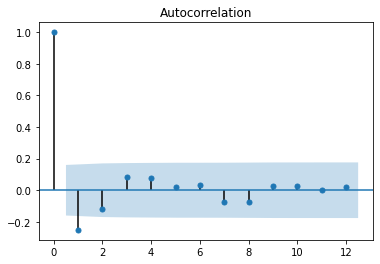

In [9]:
sm.graphics.tsa.plot_acf(result1.resid, lags=12)
plt.show()

Как показывает график, автокорреляция незначительна и имеет характер белого шума. В целом, выглядит получше, чем для недельной модели.

Посмотрим, как распределяются остатки модели.

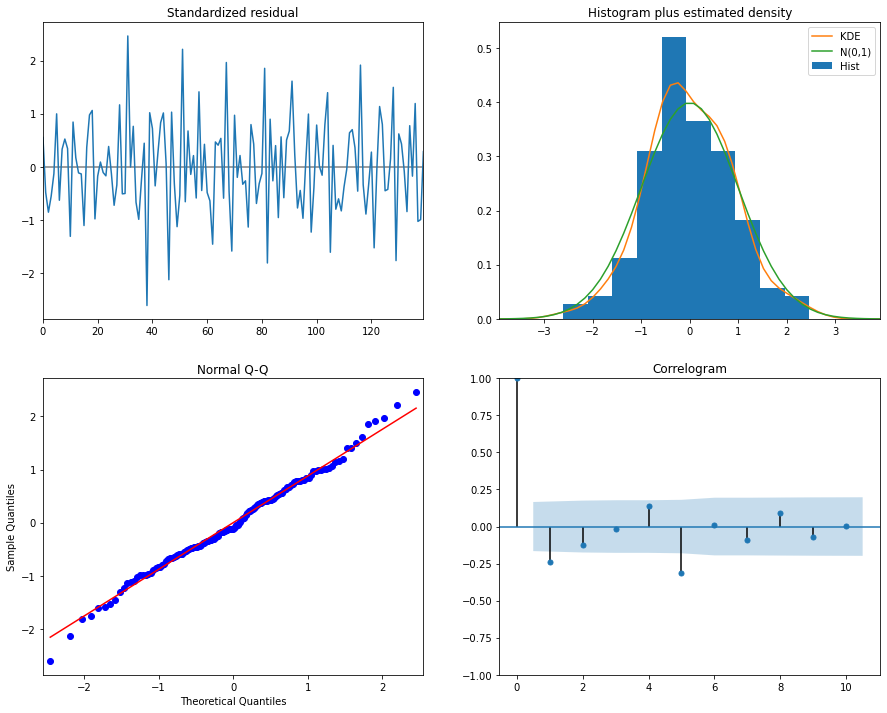

In [10]:
result1.plot_diagnostics(figsize=(15, 12))
plt.show()

На верхнем левом графике отсутствует сезонность. 

На гистограмме видим, что распредление месячной модели потребления энергии близко к нормальному (на вид, намного лучше, чем недельное). Это значит, что остатки ряда распределены нормально.

График q-q показывает, что упорядоченное распределение остатков следует линейному тренду выборок, взятых из стандартного распределения N (0, 1), однако, в сравнении с таким же графиком для недельной модели, видно небольшое улучшение с сохранением той же кривизны. 

Кореллограмма показывает, что автокорреляция данных низкая. Однако, в районе 1-ой точки (3 месяца) и 5-ой точки (15 месяц) мы видим выбросы из общей картины, это не очень хорошо. 

В целом, можем сделать вывод, что данная модель более пригодна для предсказания, чем модель для недельных данных.

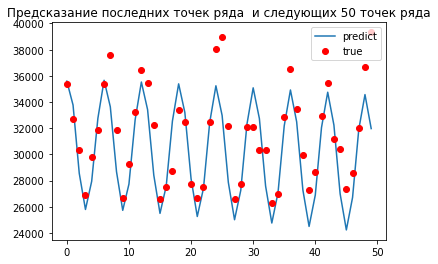

In [11]:
pred_dynamic = result1.forecast(50)    #делаем предсказание на 50 точек от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(en_month['PJME_MW'].values[-50:],'or',label='true') #50 точек, оставленных на предсказание
plt.title('Предсказание последних точек ряда  и следующих 50 точек ряда')
plt.legend()
plt.plot()
plt.show()

На графике выше видим предсказанные значения потребления энергии для тестовых данных (красные точки).Выглядит модель странно... Если бы не ряды, я бы посчитала ее переобученной. Здесь - не знаю.

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Сравнение выше, во время построения месячной модели.

В целом, обобщение и усреднение данных от недельных до месячных положительно сказалось на модели (если верить значениям оценок). Также распределение стало ближе к нормальному, что несомненно является плюсом.

#### 4. Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [97]:
covid = pd.read_csv('D:/root/GeekBrains/ds4_timeseries/Урок 3/covid_19_data.csv', index_col=[0], parse_dates=[0])
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [98]:
covR = covid[covid['Country/Region'] == 'Russia']
covR.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
483,01/31/2020,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0
541,02/01/2020,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0
611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
678,02/03/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
746,02/04/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0


In [99]:
covR['ObservationDate'] = pd.to_datetime(covR['ObservationDate'])
covR = covR.rename(columns={'ObservationDate': 'Date'})
covR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 483 to 21679
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            96 non-null     datetime64[ns]
 1   Province/State  0 non-null      object        
 2   Country/Region  96 non-null     object        
 3   Last Update     96 non-null     object        
 4   Confirmed       96 non-null     float64       
 5   Deaths          96 non-null     float64       
 6   Recovered       96 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 6.0+ KB


In [100]:
covR.set_index('Date', inplace=True)
covR.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
Date,,,,,,
2020-01-31,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0
2020-02-01,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0
2020-02-02,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
2020-02-03,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
2020-02-04,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0


In [101]:
covR['Province/State'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan], dtype=object)

In [102]:
covR.drop(['Province/State'], axis='columns', inplace=True)
covR['Last Update'] = pd.to_datetime(covR['Last Update'])
covR.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-31,Russia,2020-01-31 23:59:00,2.0,0.0,0.0
2020-02-01,Russia,2020-01-31 16:13:00,2.0,0.0,0.0
2020-02-02,Russia,2020-01-31 16:13:45,2.0,0.0,0.0
2020-02-03,Russia,2020-01-31 16:13:45,2.0,0.0,0.0
2020-02-04,Russia,2020-01-31 16:13:45,2.0,0.0,0.0


In [103]:
covR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2020-01-31 to 2020-05-05
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  96 non-null     object        
 1   Last Update     96 non-null     datetime64[ns]
 2   Confirmed       96 non-null     float64       
 3   Deaths          96 non-null     float64       
 4   Recovered       96 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.5+ KB


In [104]:
covR['Confirmed'] = covR['Confirmed'].astype(int)
covR['Deaths'] = covR['Deaths'].astype(int)
covR['Recovered'] = covR['Recovered'].astype(int)
covR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2020-01-31 to 2020-05-05
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  96 non-null     object        
 1   Last Update     96 non-null     datetime64[ns]
 2   Confirmed       96 non-null     int32         
 3   Deaths          96 non-null     int32         
 4   Recovered       96 non-null     int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 3.4+ KB


In [105]:
covR.index.isnull().sum()

0

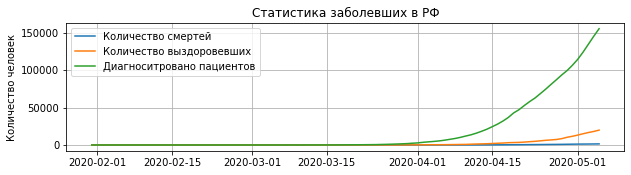

In [106]:
plt.figure( figsize=( 10, 8 ))
plt.subplot(3,1,1)

plt.ylabel('Количество человек')
plt.plot(covR.index, covR['Deaths'], label='Количество смертей')
plt.plot(covR.index, covR['Recovered'], label='Количество выздоровевших')
plt.plot(covR.index, covR['Confirmed'], label='Диагноситровано пациентов')
plt.title( 'Статистика заболевших в РФ' )
plt.grid()
plt.legend()

In [107]:
covR.tail()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
Date,,,,,
2020-05-01,Russia,2020-05-02 02:32:27,114431,1169,13220
2020-05-02,Russia,2020-05-03 02:32:28,124054,1222,15013
2020-05-03,Russia,2020-05-04 02:32:28,134687,1280,16639
2020-05-04,Russia,2020-05-05 02:32:34,145268,1356,18095
2020-05-05,Russia,2020-05-06 02:32:31,155370,1451,19865


In [108]:
covR.index.nunique() == covR.shape[0]

True

Число измерений (строк) совпадает с числом уникальных индексов - значит, повторов дат нет.

In [110]:
DFconf = sm.tsa.stattools.adfuller(covR['Confirmed'].values, regression='ctt')
DFconf

(0.5899400708748731,
 1.0,
 12,
 83,
 {'1%': -4.516530531666512,
  '5%': -3.9055629145643396,
  '10%': -3.598231051108192},
 1204.8024650006182)

Dfconf[1]=1.0 - значит, ряд нестационарен

In [111]:
DFdeath = sm.tsa.stattools.adfuller(covR['Deaths'].values, regression='ctt')
DFdeath

(-3.7278543358311564,
 0.06559458306775844,
 12,
 83,
 {'1%': -4.516530531666512,
  '5%': -3.9055629145643396,
  '10%': -3.598231051108192},
 538.1701648874559)

Dfconf[1]=0.06 - значит, ряд стационарен

In [112]:
DFrec = sm.tsa.stattools.adfuller(covR['Recovered'].values, regression='ctt')
DFrec

(5.065196555131034,
 1.0,
 12,
 83,
 {'1%': -4.516530531666512,
  '5%': -3.9055629145643396,
  '10%': -3.598231051108192},
 970.2589265391254)

Dfconf[1]=1.0 - значит, ряд нестационарен

Посмотрим, что будетс нестационарными рядами, если мы возьмем первые разности:

In [113]:
confirmed = covR[['Confirmed']].diff()
confirmed.tail(5)

,Confirmed
Date,
2020-05-01,7933.0
2020-05-02,9623.0
2020-05-03,10633.0
2020-05-04,10581.0
2020-05-05,10102.0


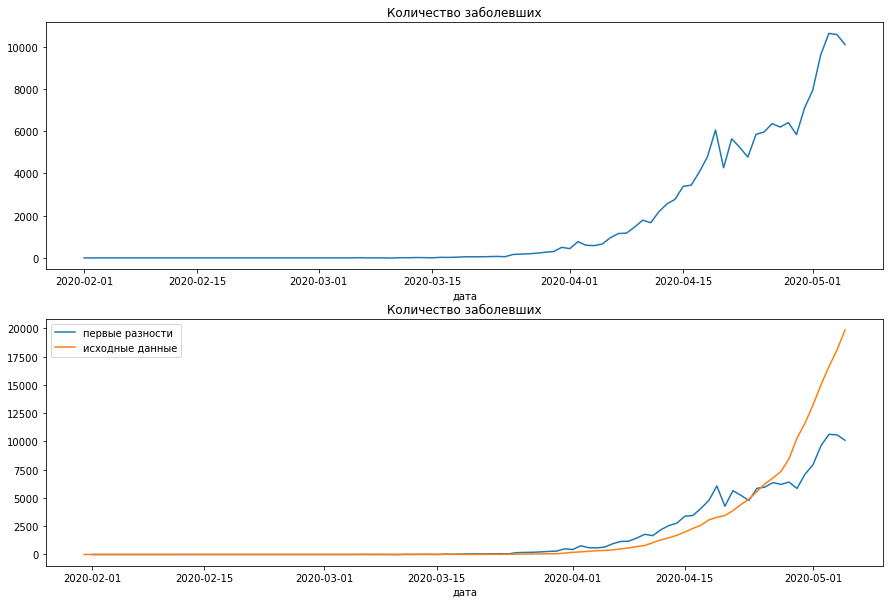

In [134]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)

plt.plot(confirmed.index, confirmed['Confirmed'])
plt.xlabel('дата')
plt.title('Количество заболевших')

plt.subplot(2,1,2)
plt.plot(confirmed.index, confirmed['Confirmed'], label = "первые разности")
plt.plot(covR.index, covR['Recovered'], label = "исходные данные")
plt.xlabel('дата')
plt.title('Количество заболевших')
plt.legend()
plt.show()

In [116]:
rec = covR[['Recovered']].diff()

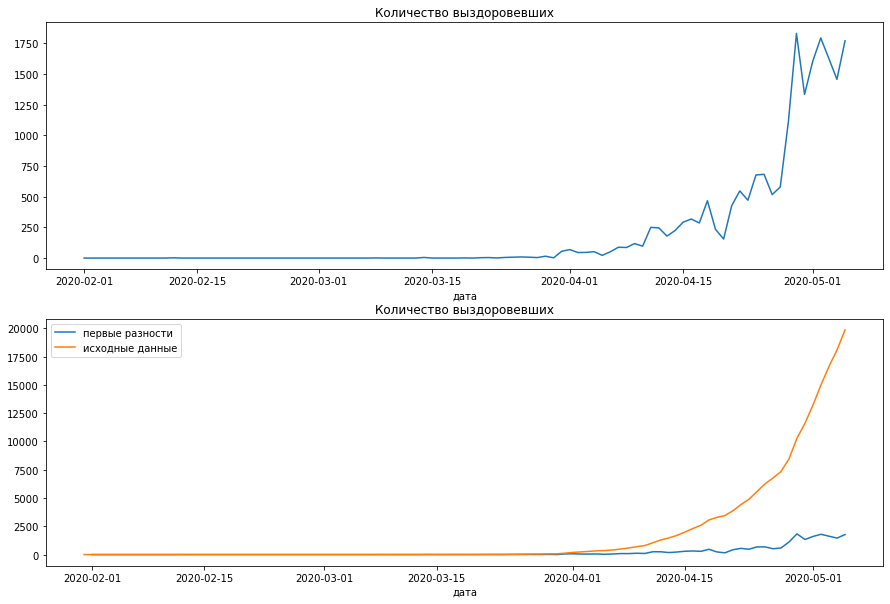

In [132]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(rec.index, rec['Recovered'])
plt.xlabel('дата')
plt.title('Количество выздоровевших')

plt.subplot(2,1,2)
plt.plot(rec.index, rec['Recovered'], label = "первые разности")
plt.plot(covR.index, covR['Recovered'], label = "исходные данные")
plt.xlabel('дата')
plt.title('Количество выздоровевших')
plt.legend()
plt.show()

Ряды все еще мало напоминают стационарные, если посмотреть на графики отдельно по первым разностям. Однако, в сравнении с исходными данными результаты обнадеживают.

Посмотрим на стационарный ряд умерших:

In [119]:
d = covR[['Deaths']].diff()

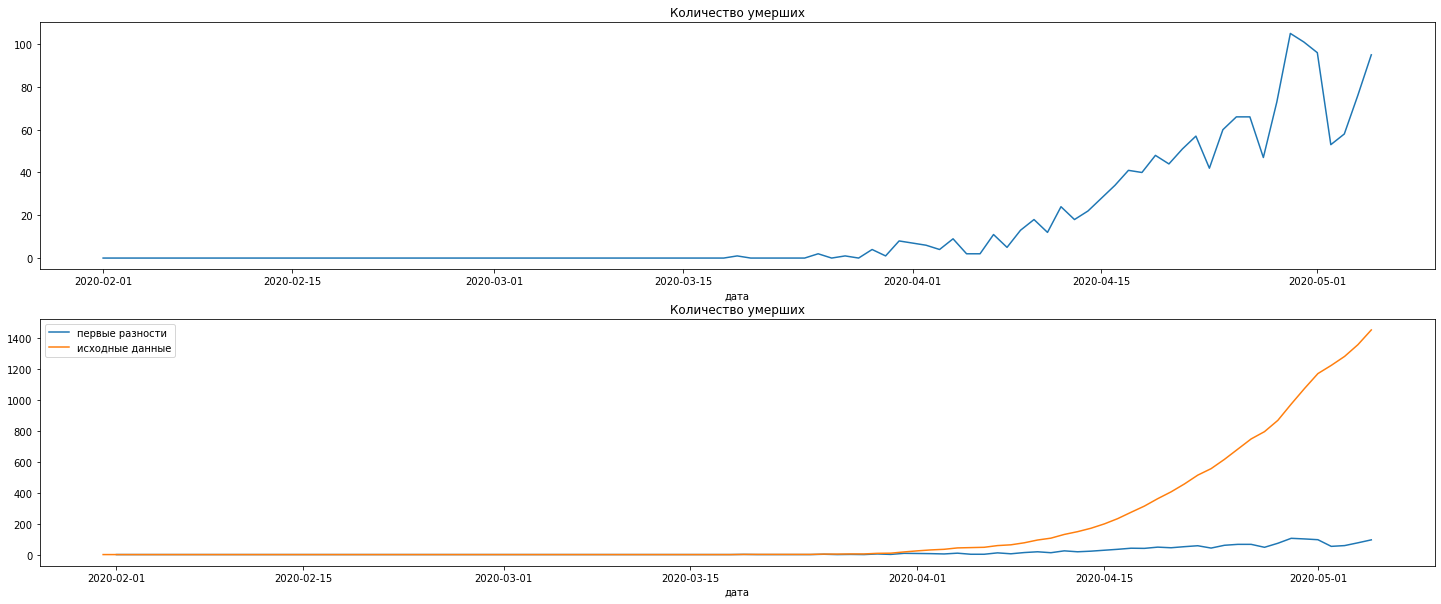

In [140]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.plot(d.index, d['Deaths'])
plt.xlabel('дата')
plt.title('Количество умерших')

plt.subplot(2,1,2)
plt.plot(d.index, d['Deaths'], label = "первые разности")
plt.plot(covR.index, covR['Deaths'], label = "исходные данные")
plt.xlabel('дата')
plt.title('Количество умерших')
plt.legend()
plt.show()

Что ж, ряд по смертям изначально был стационарен по оценке Дики-Фуллера, а сейчас он еще больше сгладился.

В целом, самый неблагонадежный (судя по графикам) - ряд общего количества заболевших. 

Рассмотрим ряд по смертям (самый обнадеживающий). Посмотрим на автокорреляцию и частичную автокорреляцию значений по количеству умерших:

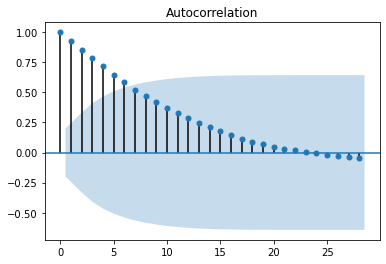

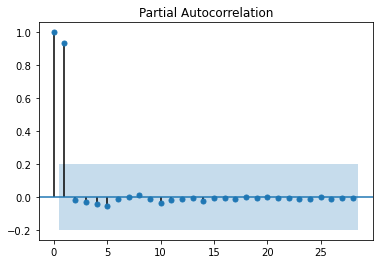

In [142]:
sm.graphics.tsa.plot_acf(covR['Deaths'].values, lags=28)
plt.show()

sm.graphics.tsa.plot_pacf(covR['Deaths'].values, lags=28)
plt.show()

Видим по первому графику нисходящую корреляцию в течение первых 20-и дней. Особенно выделяются первые 7 дней. Значит, параметр части MA нужно будет выбирать из этих чисел. На втором графике видно, что частичная автокорреляция сильна только для первых 2-х дня. В целом же, видим, что ряд стационарный. 

In [155]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 6)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

In [158]:
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore") # отключает предупреждения
p1 = list()
ps = list()
aic = list()
for param in pdq:
    try:
        mod = ARIMA(covR['Deaths'].values[:-10], order=param)
        results = mod.fit(disp=False)
        p1.append(param)
        #ps.append(param_seasonal)
        aic.append(results.aic)
        print('ARIMA{} - AIC: {}'.format(param, results.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC: 1108.7728139350615
ARIMA(0, 0, 1) - AIC: 1004.9304187956018
ARIMA(0, 0, 2) - AIC: 905.8966645885356
ARIMA(0, 0, 3) - AIC: 834.7722114695518
ARIMA(0, 0, 4) - AIC: 761.7161731757967
ARIMA(0, 0, 5) - AIC: 729.574497512249
ARIMA(0, 1, 0) - AIC: 717.565333086489
ARIMA(0, 1, 1) - AIC: 633.2404638953907
ARIMA(0, 1, 2) - AIC: 605.6230034348494
ARIMA(0, 1, 3) - AIC: 553.3642458184311
ARIMA(0, 1, 4) - AIC: 542.4907202599591
ARIMA(0, 1, 5) - AIC: 534.3879787194112
ARIMA(0, 2, 0) - AIC: 480.1443967448075
ARIMA(0, 2, 1) - AIC: 468.88964682886785
ARIMA(0, 2, 2) - AIC: 450.18691004003017
ARIMA(0, 2, 3) - AIC: 443.11633827647984
ARIMA(0, 2, 4) - AIC: 442.4102357387653
ARIMA(0, 2, 5) - AIC: 443.9793950799585
ARIMA(1, 0, 0) - AIC: 767.2500516962781
ARIMA(1, 1, 0) - AIC: 508.5187490156692
ARIMA(1, 2, 0) - AIC: 466.4821539261204
ARIMA(1, 2, 1) - AIC: 467.85565397703783
ARIMA(1, 2, 2) - AIC: 448.2520547884154
ARIMA(1, 2, 3) - AIC: 441.859075067657
ARIMA(1, 2, 4) - AIC: 443.80794257046

In [160]:
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 5, 0), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 3, 0)

In [161]:
data = {'Parameters': p1, 'AIC': aic}
info = pd.DataFrame(data)
info.head()

,Parameters,AIC
0,"(0, 0, 0)",1108.772814
1,"(0, 0, 1)",1004.930419
2,"(0, 0, 2)",905.896665
3,"(0, 0, 3)",834.772211
4,"(0, 0, 4)",761.716173


In [166]:
m = info.min()
m[1]

438.064927123891

In [168]:
m = info.min()
for i in range(len(info)):
    if info.loc[i, 'AIC'] == m[1]:
        print(info.iloc[i])

Parameters    (3, 2, 2)
AIC             438.065
Name: 35, dtype: object


In [169]:
model = ARIMA(covR['Deaths'].values[:-10],
                               order = [3, 2, 2])
result1 = model.fit()
print('AIC:{}'.format(result1.aic))

print(result1.summary().tables[0],result1.summary().tables[1])

AIC:438.064927123891
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   84
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -212.032
Method:                       css-mle   S.D. of innovations              2.975
Date:                Wed, 20 May 2020   AIC                            438.065
Time:                        21:04:13   BIC                            455.081
Sample:                             2   HQIC                           444.905
                                                                              
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0953      0.99

Видим, что коэффициенты AIC, BIQ, HQIC примерно равны, Log Likelihood отрицательный, но не такой как в моделях для потребления энергии. Интересно, что коэффициенты довольно низкие.

Посмотрим на автокорреляцию остатков:

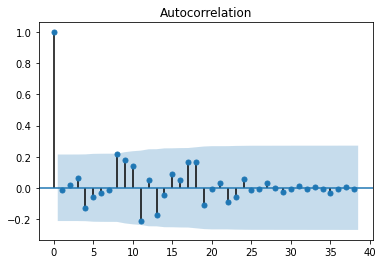

In [174]:
sm.graphics.tsa.plot_acf(result1.resid, lags=38)
plt.show()

Видим, что все же присутствует значительная автокорреляция в течении первых 20-ти дней. Это значит, что остатки модели не похожи на белый шум. (Что делать при построении ARIMA? До этого сглаживали экспоненциально, а что теперь?)

Предскажем оставшиеся данные (10 точек) и посмотрим на результат на графике:

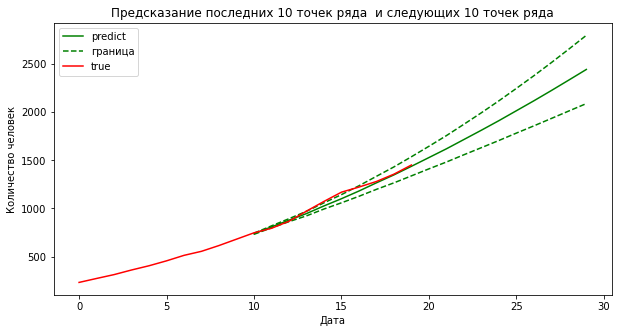

In [187]:
N=10
pred = result1.forecast(2*N)    #предскажем оставшиеся 10 точек

plt.figure( figsize=( 10, 5 ))
plt.plot(np.arange(2*N)+N, pred[0], 'g', label ='predict')
plt.plot(np.arange(2*N)+N, pred[2][:,1], '--g', label = 'граница')
plt.plot(np.arange(2*N)+N, pred[2][:,0], '--g')
plt.plot(covR['Deaths'].values[-10-N:], 'r', label ='true')

plt.xlabel('Дата')
plt.ylabel('Количество человек')
plt.title('Предсказание последних 10 точек ряда  и следующих 10 точек ряда')
plt.legend()
plt.show()

#### 5. Оцените результат моделирования

Судя по довольно низкой AIC оценке и ппо графику предсказания, модель получилась довольно хорошая. Хотя вызывает вопрос автокорреляция остатков и границы допустимых значений AIC, чтобы принять модель за "хорошую". Еще нужно учесть, что данных было мало (96 записей), а значит, построить хорошую предсказательную модель очень сложно, если не невозможно.